## Binary Tree

A Binary Tree can be implemented using two methods
1. Linked List
2. Arrays

Here we explore both the methods.

In [17]:
from collections import deque
import graphviz

### Using Linked List

In [37]:
class Node:
    def __init__(self, data):
        self.data = data
        self.left_child = None
        self.right_child = None

class BinaryTreeLinkedList:
    def __init__(self, data):
        # create a root node
        node = Node(data)
        self.root = node
        self.queue = deque()
        self.queue.append(self.root)
        
    def insert_left(self, data, parent: Node):
        node = Node(data)
        
        parent.left_child = node
        
        self.queue.append(node)
    
    def insert_right(self, data, parent: Node):
        node = Node(data)
        
        parent.right_child = node
        
        self.queue.append(node)
        
    def traversal_preorder(self, node: Node):
        # parent - left -right
        
        if node is not None:
            print(node.data, end=" -> ") 
            self.traversal_preorder(node.left_child)
            self.traversal_preorder(node.right_child)
    
    
    def traversal_postorder(self, node: Node):
        # left - right - parent
        
        if node is not None:
            self.traversal_postorder(node.left_child)
            self.traversal_postorder(node.right_child)
            print(node.data, end=" -> ") 
            
    def traversal_inorder(self, node: Node):
        # left - parent - right 
        
        if node is not None:
            self.traversal_inorder(node.left_child)
            print(node.data, end=" -> ")
            self.traversal_inorder(node.right_child)
             
    
    def traversal_level(self):
        
        # level by level
        
        if self.root is None:
            return
        
        # we need a queue to process nodes level by level
        queue = deque()
        
        print(self.root.data, end=" -- >") # visited root node
        queue.append(self.root) # added in the queue to explore root node

        while queue:
            # keep on visiting and exploring all the nodes
            node = queue.popleft() # note that it does not matter in which order we do traversal in a given level
            
            if node.left_child:
                print(node.left_child.data, end=" --> ") # visited this left child
                queue.append(node.left_child)  # added this left child in queue to explore in next level
            if node.right_child:
                print(node.right_child.data, end= " --> ")
                queue.append(node.right_child)     

In [24]:
nodes = []


def traverse_tree(node: Node):
  if node is None:
    return
  nodes.append(node)
  traverse_tree(node.left_child)
  traverse_tree(node.right_child)


def display_tree(root: Node):
  dot = graphviz.Digraph(comment='Binary Tree')
  global nodes
  nodes = []
  traverse_tree(root)

  for node in nodes:
    dot.node(name=str(node.data), label=str(node.data))

  for node in nodes:
    if node.left_child:
      dot.edge(str(node.data), str(node.left_child.data))
    if node.right_child:
      dot.edge(str(node.data), str(node.right_child.data))
  return dot

In [39]:
tree = BinaryTreeLinkedList(10)

In [40]:
while tree.queue:
    current_node = tree.queue.popleft()
    try:
        x = int(input(
                f"Enter left child for node with data {current_node.data}  (enter if its NULL) : "))
        tree.insert_left(x, current_node)
    except:
        pass

    try:
        x = int(input(
                f"Enter right child for node with data {current_node.data}  (enter if its NULL) : "))
        tree.insert_right(x, current_node)
    except:
        pass

example tree - 10, 24, 26, 32, 42, 45, 48, 12, 39, 66

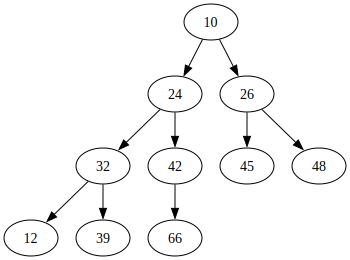

In [28]:
display_tree(tree.root)

In [41]:
print("----Pre-order traversal----")
tree.traversal_preorder(tree.root)

----Pre-order traversal----
10 -> 24 -> 32 -> 12 -> 39 -> 42 -> 66 -> 26 -> 45 -> 48 -> 

In [42]:
print("----Post-order traversal----")
tree.traversal_postorder(tree.root)

----Post-order traversal----
12 -> 39 -> 32 -> 66 -> 42 -> 24 -> 45 -> 48 -> 26 -> 10 -> 

In [43]:
print("----In-order traversal----")
tree.traversal_inorder(tree.root)

----In-order traversal----
12 -> 32 -> 39 -> 24 -> 66 -> 42 -> 10 -> 45 -> 26 -> 48 -> 

In [44]:
print("----Level-order traversal----")
tree.traversal_level()

----Level-order traversal----
10 -- >24 --> 26 --> 32 --> 42 --> 45 --> 48 --> 12 --> 39 --> 66 --> 

### Using Arrays

For a 0-base array we will use a formula to decide the location for `left_child` and `right_child` of a node.

$$
left child = 2i + 1 \\

right child = 2i + 2 \\

parent node = (i -1 // 2)
$$

In [77]:
class BinaryTreeArray:
    def __init__(self, data):
        """
        init the Tree using root node data
        """
        self.array = [None] * 30 # this will hold tree data as per the formula defined above
        self.array[0] = data # this will init the tree with root node
        
    def validate_index(self, i):
        if i < 0 or i > len(self.array)-1:
            return False
        else:
            return True
        
    def insert_left(self, index, data):
        """
        index : index of parent node
        data : data for left child
        """
        
        if not self.validate_index(index):
            return None
        
        self.array[2*index + 1] = data
        
        return 2*index + 1
    
    def insert_right(self, index, data):
        """
        index : index of parent node
        data : data for right child
        """

        if not self.validate_index(index):
            return None

        self.array[2*index + 2] = data
        
        return 2*index + 2
    
    def get_parent(self, index):
        if not self.validate_index(index):
            return None
        return self.array[(index-1)//2]
        
        
        

In [79]:
tree = BinaryTreeArray(10)

In [80]:
queue = deque()

queue.append(0)

while queue:
    current_index = queue.popleft()
    try:
        x = int(input(
                f"Enter left child for node with index {current_index}  (enter if its NULL) : "))
        idx = tree.insert_left(current_index, x)
        queue.append(idx)
    except IndexError:
        break
    except ValueError:
        pass

    try:
        x = int(input(
                f"Enter right child for node with index {current_index}  (enter if its NULL) : "))
        idx = tree.insert_right(current_index, x)
        queue.append(idx)
    except IndexError:
        break
    except ValueError:
        pass

In [83]:
tree.array[:10]

[10, 12, 14, 18, 24, 34, 54, 56, None, None]

In [84]:
tree.get_parent(3)

12